# Multi-Layer Perceptron - MNIST dataset.


The well-known handwritten numbers **MNIST** dataset contains a training set of 60,000 examples, and a test set of 10,000 examples, each one of 28x28 pixels (784 pixels). This dataset is available in [Yann LeCun's website](http://yann.lecun.com/exdb/mnist/). For the sake of simplicity, we have reduced the dataset to only 20,000 samples, which in turn will be split between training and test images (you can work directly with LeCun's original MNIST, but the reduced file we have created and we are going to use is *mnist_train_small.csv*).

That is to say, we will work with a dataset of dimensions 20,000x784. Each of the input variables contains an integer value that varies from 0 to 255 indicating the grayscale intensity of the corresponding pixel. We will design and train a **MNIST** image classifier to achieve better accuracy than the **Logistic Regression** model or semi-supervised classifier. To do this, we will use the functionality of the **Keras** library, specifically ***tensorflow.keras***. First, we import the necessary libraries and load the data:



In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import matplotlib.pyplot as plt

# We load the dataset from the file with pandas
mnist = pd.read_csv("./sample_data/mnist_train_small.csv", header=None).as_matrix()

# X: sample attributes(20000x784), Y: sample labels (20000x1)
X, Y = mnist[:, 1:], mnist[:, 0:1]

Then, it is necessary to **scale** the data, convert labels to **one-hot label encoding**, and to **split** our images into *training data* (70%) and *validation data* (30%):

In [0]:
from tensorflow.keras.utils      import to_categorical
from sklearn.model_selection import train_test_split

Xt = X / 255  # Scale the data matrix (20000x744)
Yt = to_categorical(Y, 10)  # One-hot encoding: [1,0,0,...,0], [0,1,0,...,0], ..., [0,0,...,0,1]

X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, train_size=0.7, test_size=0.3)  # Partitioning in training and test data

Now, it's time to build the model with **Keras**. We will use a Multi-Layer Perceptron with 2 hidden layers (in:128 neurons - 64 neurons - 32 neurons - out:10 neurons). This is the architecture that has experimentally achieved the best results, combined with *ReLu* as activation function excepting in the output layer, that must be *softmax*, as labels are one-hot encoded.

In [0]:
import tensorflow as tf
from tensorflow.keras.layers     import Dense, Dropout
from tensorflow.keras.optimizers import SGD

mlp = tf.keras.Sequential()

mlp.add(Dense(128, activation='relu'))
mlp.add(Dropout(0.4))  # Dropot as regularization technique to prevent overfitting
mlp.add(Dense(64, activation='relu'))  # Hidden layer
mlp.add(Dropout(0.4))
mlp.add(Dense(32, activation='relu'))  # Hidden layer
mlp.add(Dropout(0.4))
mlp.add(Dense(10, activation='softmax'))  # Output layer, activation function: Softmax, essential in deep learning multiple classifiers


mlp.compile(loss='categorical_crossentropy',  # loss function to predict mutiple categorical labels
              optimizer=tf.keras.optimizers.Adam(),  # Combines the advantages of two SGD algorithms: AdaGrad and RMSProp
              metrics=['acc'])

We will train the model with the training data partition, and it will only complete 15 epochs, only in order to illustrate the training phase:

In [4]:
  # We save in mlp_info, as it provides useful information for plotting loss and accuracy in training and validation
mlp_info = mlp.fit(X_train, Y_train,
          batch_size=32,
          epochs=15,  # Little epoch for demonstration purposes only
          verbose=1,  # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
          validation_data=(X_test, Y_test))  # In addition to train data metrics, display validation data metrics

Train on 14000 samples, validate on 6000 samples
Epoch 1/15
14000/14000 [==============================] - 4s 253us/step - loss: 0.4943 - acc: 0.8526 - val_loss: 0.2803 - val_acc: 0.9152
Epoch 2/15
14000/14000 [==============================] - 3s 190us/step - loss: 0.1876 - acc: 0.9441 - val_loss: 0.2069 - val_acc: 0.9392
Epoch 3/15
14000/14000 [==============================] - 3s 186us/step - loss: 0.1216 - acc: 0.9632 - val_loss: 0.1971 - val_acc: 0.9457
Epoch 4/15
14000/14000 [==============================] - 3s 191us/step - loss: 0.0950 - acc: 0.9707 - val_loss: 0.1749 - val_acc: 0.9483
Epoch 5/15
14000/14000 [==============================] - 3s 189us/step - loss: 0.0725 - acc: 0.9763 - val_loss: 0.1739 - val_acc: 0.9505
Epoch 6/15
14000/14000 [==============================] - 3s 185us/step - loss: 0.0465 - acc: 0.9853 - val_loss: 0.1719 - val_acc: 0.9533
Epoch 7/15
14000/14000 [==============================] - 3s 193us/step - loss: 0.0437 - acc: 0.9869 - val_loss: 0.1787 - v

The learning curves have a good appearance, as the neural network learns quite quickly to classify the numbers of the **MNIST** dataset. The model **loss** for the validation set is not as low as the *loss* for the training set, and the accuracy for the validation data is not as high as that of the training data. However, both remain in the same range, which indicates that the model generalizes well:

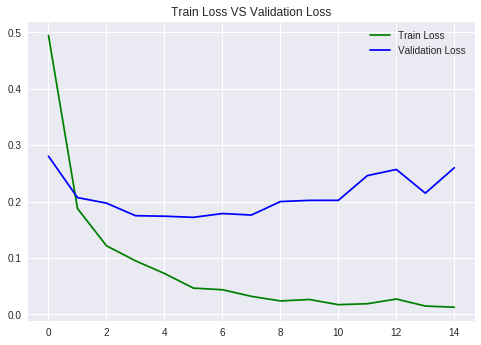

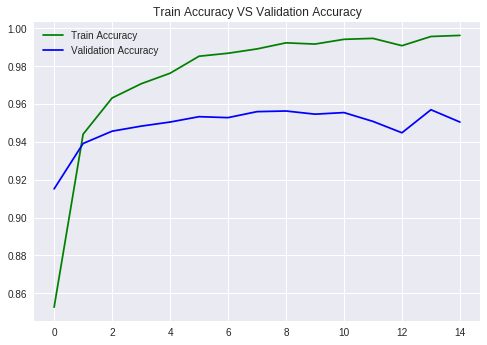

In [5]:
plt.title("Train Loss VS Validation Loss")
plt.plot(mlp_info.history['loss'],     c='g')
plt.plot(mlp_info.history['val_loss'], c='b')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

plt.title("Train Accuracy VS Validation Accuracy")
plt.plot(mlp_info.history['acc'],     c='g')
plt.plot(mlp_info.history['val_acc'], c='b')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

Even so, a model can achieve greater accuracy for the validation dataset if any other architecture, more suitable than Multi-Layer Perceptron, are adopted for image classification, i.e. Convolutional Neural Networks. To conclude this notebook, let's have a look at some randomly selected erroneous predictions by the model: 

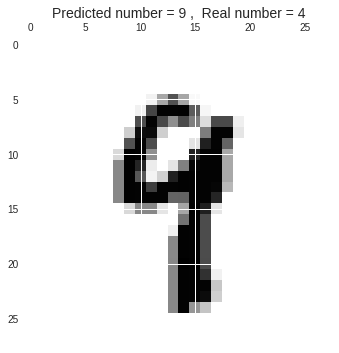

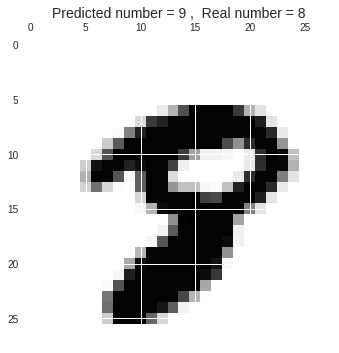

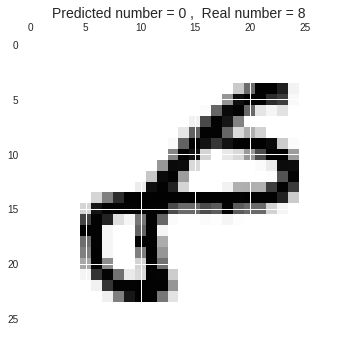

In [10]:
from random import shuffle

orig_labels = np.argmax(Y_test, axis=1)  # Real labels
pred_labels = np.argmax(mlp.predict(X_test), axis=1)  # Predicted labels

pos = np.arange(0, X_test.shape[0], 1)
np.random.shuffle(pos)  # Randomize pos elements for checking 'hit or miss' below

sh = 0

for i in pos:
  if(orig_labels[i] != pred_labels[i]):  # Plot if erroneous prediction
    plt.matshow(X_test[i,:].reshape(28, 28))
    plt.title("Predicted number = " + str(np.argmax(mlp.predict(X_test[i:i+1,:]))) + " ,  Real number = " + str(np.argmax(Y_test[i:i+1,:])),fontsize=14)
    plt.show()
    sh+=1
    if(sh==3): break  # Only want to plot 3 cases